In [1]:
import numpy as np
import pandas as pd
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from tensorflow.keras.models import load_model

2024-08-29 10:20:33.249191: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-29 10:20:33.289059: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-29 10:20:33.909482: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import os
import sys
import pathlib
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)
current_file_path = pathlib.Path(os.getcwd())
parent_dir = current_file_path.parent
import swallowing_recognition

In [3]:
from swallowing_recognition import wavelet
from swallowing_recognition import dataset
from swallowing_recognition import long_audio

In [10]:
# directory_path = parent_dir / '30min_data'
directory_path = parent_dir 

In [54]:
path = directory_path / 'experiment'/ 'experiment2'/'ohnishi'/'4.wav'

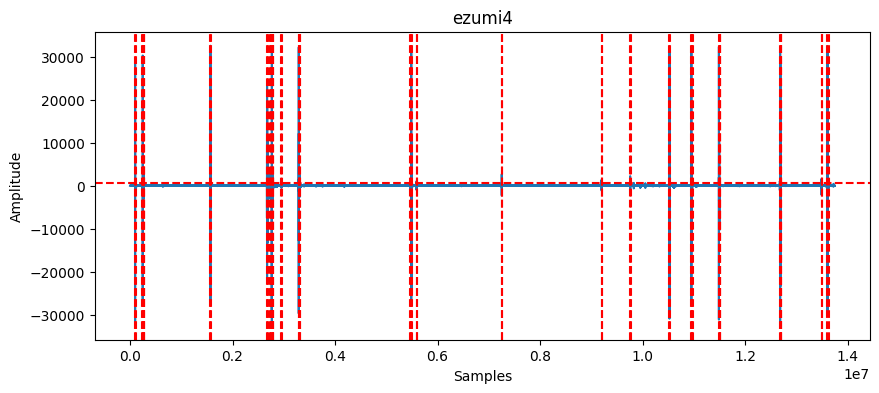

[99613, 239049, 248140, 265966, 1567292, 2672166, 2740442, 2758964, 2789016, 2955064, 3292092, 3306789, 5464012, 5480297, 5589548, 7252111, 9199502, 9756965, 10518509, 10950158, 10968272, 11488914, 11504205, 12677997, 12699797, 13491843, 13606465]
[111063, 247344, 263799, 274249, 1582445, 2697278, 2749121, 2781853, 2797584, 2963267, 3306413, 3315157, 5472395, 5499478, 5597785, 7260482, 9207861, 9765358, 10539638, 10963088, 10976614, 11503561, 11513660, 12696869, 12708153, 13500274, 13629432]


In [55]:
wav1 = long_audio.Long_audio(path, threshold = 0.02)
# ezumi 0.028
# soichiro 0.01
# haruki 0.02
# ibuki 0.02 (4だけ0.04)
# hikaru 0.02
# kazuki 0.02
# tsuji 0.02 (1だけ0.036)
# nakaryo 0.02
# kosasa 0.02 
# kishimoto 0.02 (2は0.064，4と5は0.05)
# kanata 0.05 (3と5は0.02)
# ruku 0.02
# shibata 0.02(3は0.04)
# mocchiは0.05 
# kimは0.02
# genkiは0.02
# kyogoku 1と3は0.05, 2は0.06 4は0.04, 5は0.03
# ohnishi 0.02

wav1.plot("ezumi4")
print(wav1.start_idxs)
print(wav1.end_idxs)

In [56]:
current_path = directory_path
model_path = current_path / 'ipynb_swallowing' / '202400614_binary_ep40_bs32_all.keras'
wav1.predict(model_path, 2)

(27, 224, 224, 3)
1/1 [==============================] - 2s 2s/step
Predicted classes: [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0]


In [57]:
print(len(wav1.swallowing_start_idxs))
start_array = wav1.swallowing_start_idxs/44100
end_array = wav1.swallowing_end_idxs/44100

24


In [58]:
start_list = list(start_array)
end_list = list(end_array)
print(start_list)
print(end_list)

[2.258798185941043, 5.420612244897959, 5.626757369614513, 6.030975056689343, 35.53950113378685, 60.593333333333334, 62.14154195011338, 62.56154195011338, 63.24299319727891, 74.65061224489796, 74.98387755102041, 123.90049886621316, 124.26977324263038, 164.44696145124718, 208.60548752834467, 238.5149433106576, 248.30290249433108, 248.7136507936508, 260.5195918367347, 260.86632653061224, 287.48292517006803, 287.97725623582767, 305.9374829931973, 308.53662131519275]
[2.51843537414966, 5.608707482993197, 5.981836734693878, 6.2187981859410435, 35.883106575963716, 61.1627664399093, 62.33834467120182, 63.080566893424034, 63.437278911564626, 74.9753514739229, 75.17362811791384, 124.090589569161, 124.70471655328798, 164.6367800453515, 208.79503401360543, 238.9940589569161, 248.59609977324263, 248.90281179138321, 260.8517233560091, 261.0807256235828, 287.91086167800455, 288.1667346938776, 306.12866213151926, 309.05741496598637]


In [59]:
wav1.save_plots_to_pdf('ohnishi4.pdf')

## ここまでは必ずやる
やっていることは  
import  
どのwavファイルを解析するか指定  
wavファイルをデータセットにしウェーブレット変換  
変換したものを学習  

In [32]:
sections = np.arange(0, 361, 120)
counts, _ = np.histogram(start_array, bins=sections)

print("Sections:", sections)
print("Counts in each section:", counts)
print(start_array)

Sections: [  0 120 240 360]
Counts in each section: [2 4 2]
[  6.17929705  21.29680272 149.59349206 151.81181406 183.65630385
 190.37732426 307.60938776 310.56385488]


In [ ]:
# 各セクションでの嚥下時間の合計と平均を計算するためのリスト
total_durations = []
mean_durations = []

# sections = np.arange(900, 1141, 120)
# sections = np.arange(960, 1201, 120)
# sections = np.arange(900, 1201, 300)

# セクションごとに処理
for i in range(len(sections) - 1):
    # セクション内での嚥下の開始と終了時間を抽出
    mask = (start_array >= sections[i]) & (start_array < sections[i + 1])    
    section_start_times = start_array[mask]
    section_end_times = end_array[mask]
    
    # 嚥下時間の計算
    swallow_durations = section_end_times - section_start_times
    
    # 嚥下時間の合計と平均の計算
    total_duration = np.sum(swallow_durations)
    mean_duration = np.mean(swallow_durations) if swallow_durations.size > 0 else 0  # 嚥下がない場合は平均を0とする
    
    # 結果をリストに追加
    total_durations.append(total_duration)
    mean_durations.append(mean_duration)
    
    # 結果の表示
    print(f"Section from {sections[i]} to {sections[i + 1]} seconds:")
    print(f"  Total swallowing duration: {total_duration} seconds")
    print(f"  Mean swallowing duration: {mean_duration:.2f} seconds\n")

In [29]:
wav1.save_png_swallowing_number_line('ohnishi3.png')
wav1.display_HTML('ohnishi3.png')

13697947


### wavファイルの嚥下と識別された部分を図示

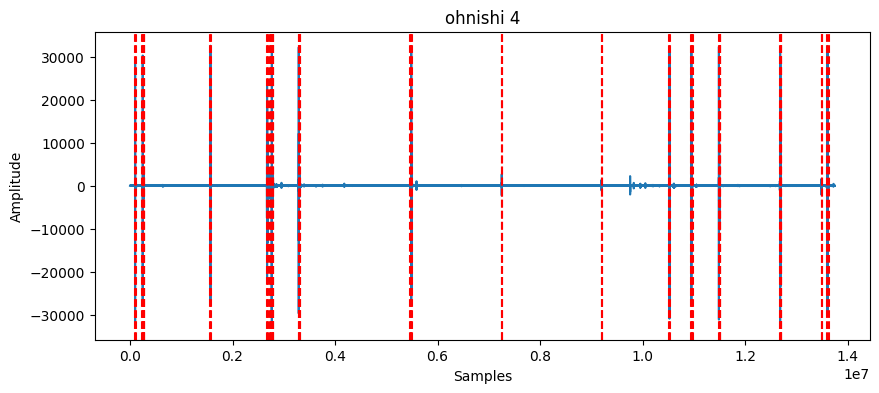

In [60]:
# wav1.plot_predicted("lemon_washino_5min.wav")
wav1.plot_predicted("ohnishi 4")

### 嚥下回数を前後30秒の計60秒で何回しているか図示

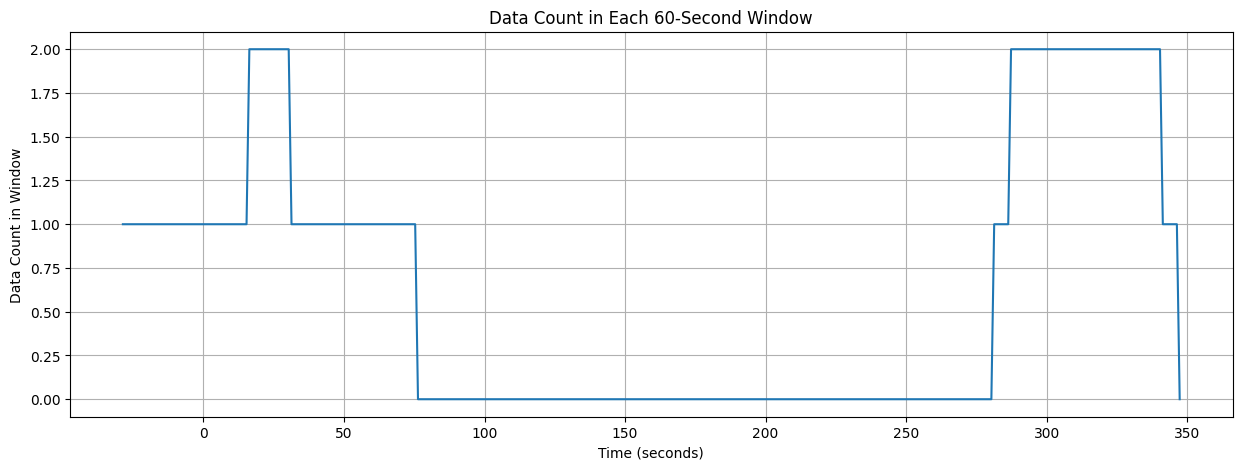

In [24]:
wav1.plot_swallowing_count(window_size = 30, interval = 1)

### 唾液推定に必要な数字を算出
wavファイル内の嚥下回数  
ある範囲の回数を認識
リスト形式でプリント
嚥下の時間を算出

In [15]:
time = end_array - start_array
print(list(time))
print((np.mean(time)))
print(np.sum(time))

[0.32442176870748307, 0.2780725623582754, 0.1917687074829928, 0.37492063492061334, 0.30181405895689295]
0.2941995464852515
1.4709977324262575


### wavファイルの波形と嚥下タイミングを描画